In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve


In [2]:
user_dataframes = []

for user_id in range(5):
    filename = f"User{user_id}_BEHACOM.csv"
    
    # Read CSV without memory optimization
    data_user = pd.read_csv(filename, encoding='latin-1')
    
    # Select 1100 random rows from each user's data
    selected_data = data_user.sample(n=1100, random_state=42)
    
    # Append the DataFrame to the list
    user_dataframes.append(selected_data)

# Print the number of rows for each user's DataFrame
for i, df in enumerate(user_dataframes, 1):
    print(f"User {i}: {df.shape[0]} rows")


User 1: 1100 rows
User 2: 1100 rows
User 3: 1100 rows
User 4: 1100 rows
User 5: 1100 rows


In [3]:
# Iterate through each user's DataFrame
for user_id, user_df in enumerate(user_dataframes, start=1):  # Start from user 2
    # Replace 'USER' column value for dataset user2, user3, user4, and user5 with '2', '3', '4', and '5'
    user_df['USER'] = str(user_id)
    
    # Display the updated DataFrame
    print(f"\nUser {user_id} DataFrame:")
    print(user_df)


User 1 DataFrame:
         timestamp  keystroke_counter  erase_keys_counter   
1033  1.574788e+12                 11                   0  \
5939  1.578759e+12                  0                   0   
1057  1.574790e+12                 17                   1   
2519  1.576150e+12                 55                   5   
5740  1.578678e+12                  2                   0   
...            ...                ...                 ...   
1921  1.575898e+12                  0                   0   
4981  1.578402e+12                  0                   0   
336   1.574458e+12                  9                   0   
5306  1.578474e+12                  0                   0   
2732  1.576660e+12                  0                   0   

      erase_keys_percentage  press_press_average_interval   
1033                   0.00                       5252.30  \
5939                   0.00                          0.00   
1057                   0.06                        826.56   
2519

In [4]:
# Print the first two rows for all users
for user_id, user_df in enumerate(user_dataframes, start=1):
    print(f"\nFirst two rows for User {user_id}:")
    print(user_df.head(2))



First two rows for User 1:
         timestamp  keystroke_counter  erase_keys_counter   
1033  1.574788e+12                 11                   0  \
5939  1.578759e+12                  0                   0   

      erase_keys_percentage  press_press_average_interval   
1033                    0.0                        5252.3  \
5939                    0.0                           0.0   

      press_press_stddev_interval  press_release_average_interval   
1033                      6662.48                          482.27  \
5939                         0.00                            0.00   

      press_release_stddev_interval  word_counter  word_average_length  ...   
1033                         281.31             0                  0.0  ...  \
5939                           0.00             0                  0.0  ...   

      current_app_stddev_cpu  system_average_cpu  system_stddev_cpu   
1033                    0.00                1.69               0.34  \
5939            

In [5]:
# Concatenate DataFrames of all users
all_users_df = pd.concat(user_dataframes, ignore_index=True)

# Display the combined DataFrame
print(all_users_df)


         timestamp  keystroke_counter  erase_keys_counter   
0     1.574788e+12                 11                   0  \
1     1.578759e+12                  0                   0   
2     1.574790e+12                 17                   1   
3     1.576150e+12                 55                   5   
4     1.578678e+12                  2                   0   
...            ...                ...                 ...   
5495  1.575047e+12                  0                   0   
5496  1.575479e+12                  8                   1   
5497  1.574335e+12                  0                   0   
5498  1.575908e+12                  0                   0   
5499  1.575994e+12                  0                   0   

      erase_keys_percentage  press_press_average_interval   
0                      0.00                       5252.30  \
1                      0.00                          0.00   
2                      0.06                        826.56   
3                      

In [6]:
# Selecting columns of interest
selected_columns = [
    'keystroke_counter',
    'erase_keys_counter',
    'erase_keys_percentage',
    'press_press_average_interval',
    'press_press_stddev_interval',
    'press_release_average_interval',
    'press_release_stddev_interval',
    'word_counter',
    'word_average_length',
    'word_stddev_length',
    'active_apps_average',
    'changes_between_apps',
    'current_app_foreground_time',
    'current_app_average_processes',
    'current_app_stddev_processes',
    'current_app_average_cpu',
    'current_app_stddev_cpu',
    'system_average_cpu',
    'system_stddev_cpu',
    'current_app_average_mem',
    'current_app_stddev_mem',
    'system_average_mem',
    'system_stddev_mem',
    'received_bytes',
    'sent_bytes',
    'USER'
]

# Create a DataFrame with only the selected columns
selected_df = all_users_df[selected_columns]

# Display the selected DataFrame
print(selected_df)


      keystroke_counter  erase_keys_counter  erase_keys_percentage   
0                    11                   0                   0.00  \
1                     0                   0                   0.00   
2                    17                   1                   0.06   
3                    55                   5                   0.09   
4                     2                   0                   0.00   
...                 ...                 ...                    ...   
5495                  0                   0                   0.00   
5496                  8                   1                   0.12   
5497                  0                   0                   0.00   
5498                  0                   0                   0.00   
5499                  0                   0                   0.00   

      press_press_average_interval  press_press_stddev_interval   
0                          5252.30                      6662.48  \
1                        

In [7]:
print(selected_df.dtypes)

keystroke_counter                   int64
erase_keys_counter                  int64
erase_keys_percentage             float64
press_press_average_interval      float64
press_press_stddev_interval       float64
press_release_average_interval    float64
press_release_stddev_interval     float64
word_counter                        int64
word_average_length               float64
word_stddev_length                float64
active_apps_average               float64
changes_between_apps                int64
current_app_foreground_time       float64
current_app_average_processes     float64
current_app_stddev_processes      float64
current_app_average_cpu           float64
current_app_stddev_cpu            float64
system_average_cpu                float64
system_stddev_cpu                 float64
current_app_average_mem           float64
current_app_stddev_mem            float64
system_average_mem                float64
system_stddev_mem                 float64
received_bytes                    

In [8]:
X = selected_df.drop(columns=['USER'])
y = selected_df['USER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
# Train random forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Evaluation
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model
}

In [12]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": report['accuracy'],
        "Precision": report['macro avg']['precision'],
        "Recall": report['macro avg']['recall'],
        "F1 Score": report['macro avg']['f1-score']
    }

In [13]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.897273,0.894530,0.894028,0.893892
Random Forest,0.975455,0.975342,0.975368,0.975288


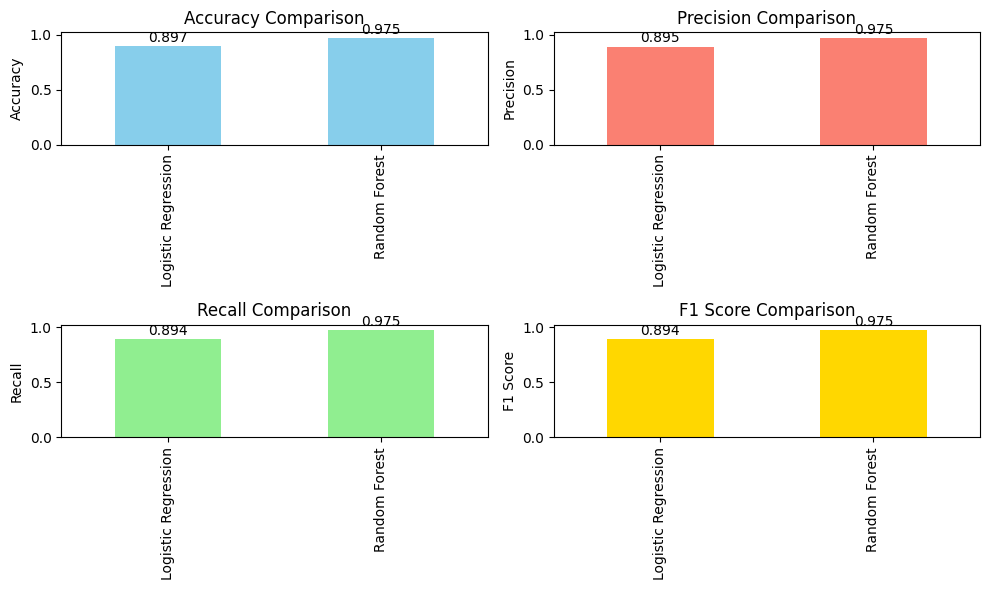

In [14]:
# Plotting
plt.figure(figsize=(10, 6))

# Accuracy comparison
plt.subplot(2, 2, 1)
accuracy_plot = results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
for i in accuracy_plot.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01, f"{i.get_height():.3f}", ha='center', va='bottom')

# Precision comparison
plt.subplot(2, 2, 2)
precision_plot = results_df['Precision'].plot(kind='bar', color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')
for i in precision_plot.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01, f"{i.get_height():.3f}", ha='center', va='bottom')

# Recall comparison
plt.subplot(2, 2, 3)
recall_plot = results_df['Recall'].plot(kind='bar', color='lightgreen')
plt.title('Recall Comparison')
plt.ylabel('Recall')
for i in recall_plot.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01, f"{i.get_height():.3f}", ha='center', va='bottom')

# F1 Score comparison
plt.subplot(2, 2, 4)
f1_score_plot = results_df['F1 Score'].plot(kind='bar', color='gold')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
for i in f1_score_plot.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01, f"{i.get_height():.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [16]:
# Get confusion matrices for both models
confusion_matrix_logistic = confusion_matrix(y_test, logistic_model.predict(X_test_scaled))
confusion_matrix_random_forest = confusion_matrix(y_test, random_forest_model.predict(X_test_scaled))


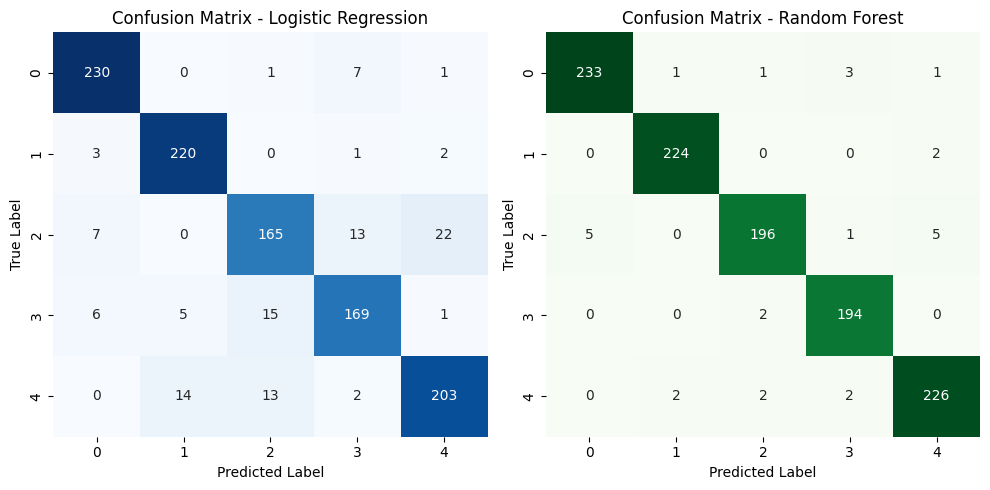

In [17]:
# Plot heatmap for logistic regression model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot heatmap for random forest model
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [30]:
# Read the CSV file
test_data = pd.read_csv('test_data.csv')

# Select only the columns of interest for preprocessing
test_data_selected = test_data[selected_columns[:-1]]  # Exclude the 'USER' column

# Preprocess the selected data
test_data_scaled = scaler.transform(test_data_selected)

# Predict using logistic regression model
logistic_pred = logistic_model.predict(test_data_scaled)

# Predict using random forest model
random_forest_pred = random_forest_model.predict(test_data_scaled)

# Print the predictions separately
print("Logistic Regression Predictions:")
for i, log_pred in enumerate(logistic_pred, 1):
    print(f"Data Point {i}: Predicted User: {log_pred}")

print("\nRandom Forest Predictions:")
for i, rf_pred in enumerate(random_forest_pred, 1):
    print(f"Data Point {i}: Predicted User: {rf_pred}")


Logistic Regression Predictions:
Data Point 1: Predicted User: 5
Data Point 2: Predicted User: 5
Data Point 3: Predicted User: 2

Random Forest Predictions:
Data Point 1: Predicted User: 5
Data Point 2: Predicted User: 5
Data Point 3: Predicted User: 2


In [31]:
# Print the 'USER' column
print("USER Column:")
print(test_data['USER'])


USER Column:
0    5
1    5
2    2
Name: USER, dtype: int64
